# Exploração e Tratamento dos Fatores Clínicos e Laboratoriais para Prever Doenças Cardíacas

Este projeto tem como objetivo fazer a exploração e o tratamento do *data set* que levanta os fatores clínicos e laboratoriais para prever a tendência das doenças cardíacas nos pacientes. O arquivo final tratado será exportado, permitindo de imediato futuros trabalhos de análise estatística ou elaborações de modelos de machine learning. 

O *data set* foi obtido do kaggle e seu download pede ser feito no [site](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

A exploração e o tratamento dos dados deve ser realizado para todos os pacientes, deve-se resolver os problemas de duplicidade, inconsistência, completude, conformidade e integridade.





## Dicionário das Variáveis

Variável                | Significado                                 | Valores Permitidos
---------               | ------                                      | -----
Age                     |  Idade do paciente                          | 20-100
Sex                     |  Sexo do paciente                           | F, M
Chest Pain Type         |  Tipo de Dor no Peito                       | ASY, ATA, NAP, TA
Resting BP              |  Pressão Sanguínea em Repouso em mmGh       | 75-250
Cholesterol             |  Colesterol séricodo paciente               | 60-700
Fasting BS              |  Açucar no sangue em jejum                  | 0, 1 
Resting ECG             |  Eletrocardiograma em repouso               | LVH, Normal, ST 
Max HR                  |  Frequência cardíaca máxima                 | 40-300
Exercise Angina         |  Angina induzida por exercício              | N, Y
Old Peak                |  Depressão de ST por exercício ao repouso   | (-5) - (7)
ST_Slope                |  Inclinação do segmento ST no ECG           | Down, Flat, Up
Heart Disease           |  Doença cardíaca (NÃO/SIM)                  | 0, 1


## Carregando as bibliotecas

In [2]:
import numpy as np  # importando a biblioteca numpy para a manipulação e operação de arrays.
import pandas as pd  # importando a biblioteca pandas para a manipulação de data frames.
import matplotlib.pyplot as plt # importando a biblioteca para plotar gráficos.
import seaborn as sns # importando a biblioteca para plotar gráficos.
import statistics as sts # importando a biblioteca para fazer as operações estatísticas.

## Carregando o Data Set

In [4]:
df_doencas_cardiacas = pd.read_csv('/content/drive/MyDrive/trabalho/TD_doença_cardiaca.csv', 
sep=',', encoding='iso-8859-1')

# COMENTÁRIOS SOBRE O CÓDIGO

# pd.read_csv(...) é um método de leitura de aruivos csv da biblioteca pandas.
# o primeiro argumento direciona o caminho do diretório que contém o arquivo de leitura, o segundo argumento sep = '...' 
# deve informar como os dados estão separados no arquivo e o último argume não os métodos de leitura possíveis.
# métodos de leituras possíve:  

## Explorando os Dados



### 1) Primeira Visualização dos Dados 

Através da saída dos códigos abaixo, foi observado que o data frame está de acordo com o número de variáveis que foi apresentado no dicionário, um total de 12, também foi mostrado que o número de linhas que esse data frame possue corresponde a 918.

In [5]:
df_doencas_cardiacas.head()  # Verificando o cabeçalho do arquivo.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df_doencas_cardiacas.tail()  # Verificando o cabeçalho do arquivo.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df_doencas_cardiacas.shape   # Visualizando o formato do arquivo. 

(918, 12)

In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método head(...) permite a visualização das 5 primeiras linhas do data frame passado no primeiro argumento. Se for
# passado um segundo argumento, pode-se especificar o número de linhas a ser exibido nesse método.
# O método tail(...) permite a visualização das 5 linhas finais do data frame passado no primeiro argumento. Se for
# passado um segundo argumento, pode-se especificar o número de linhas a ser exibido nesse método.
# O atributo .shape retornar o número de linhas e colunas que o data frame contém.

### 2) Modificando o Nome das Variáveis

O nome de algumas variáveis presente no dicionário do arquivo de dados foi traduzido para o português, além disso foi alterado o nome de algumas outras, com objetivo de deixar mais claro a interpretação e o significado delas.


In [8]:
df_doencas_cardiacas.columns = ['idade', 'sexo', 'tipo_dor_peito', 'pressao', 'colesterol', 'acucar_no_sangue', 
  'ecg', 'max_freq_cardiaca', 'angina_pós_exercicio', 'depressao_st', 'inclinacao_st', 'doenca_cardiaca']  # modificando
# o nome das variáveis com o atributo .columns 
df_doencas_cardiacas  # Exibindo a modificação do nome das variáveis. 

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O atributo .columns permite modificar o nome das variáveis do data frame, bastando passar um vetor, 
# com a mesma dimensão do número de colunas do data frame, onde os elementos desse vetor sejam os nomes 
# desejados a fazer a modificação. 

### 3) Levantamento das Variáveis Categóricas e Numéricas

Agora, definitivamente, inicia-se a etapa da exploração de dados, dando início ao levantamento das variáveis categóricas e numéricas. Foi observado, pelas classes obtidas abaixo que *idade*, *pressao*, *colesterol*, *acucar_no_sangue*, *max_freq_cardiaca*, *depressao_st*, *doenca_cardiaca* são variáveis numéricas, o restante são categóricas.

Também foi constado que a classe referente a variável *doenca_cardica* e *acucar_no_sangue* encaixasse melhor na classificação de object, e não no tipo int64, já que essa dá uma resposta *True* ou *False* com os valores 1 e 0. Portanto, no tratamento dos dados, essas variáveis devem se tornar categóricas.

In [9]:
df_doencas_cardiacas.dtypes # verificando a classe das variáveis.

idade                     int64
sexo                     object
tipo_dor_peito           object
pressao                   int64
colesterol                int64
acucar_no_sangue          int64
ecg                      object
max_freq_cardiaca         int64
angina_pós_exercicio     object
depressao_st            float64
inclinacao_st            object
doenca_cardiaca           int64
dtype: object

In [10]:
df_doencas_cardiacas.describe()  # da as informações estatísticas gerais das variáveis categóricas.

,idade,pressao,colesterol,acucar_no_sangue,max_freq_cardiaca,depressao_st,doenca_cardiaca
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O atributo dtypes permite verificar qual a classe das variáveis.
# O método .describe(...) passa um relatório completo das informações estatísticas das variáveis numéricas
# presentes, como as medidas de centrabilidade, posição e de variabilidade, além de contar o número
# total de linhas.

### 4) Erros de Duplicidade

Não existem linhas duplicadas, de acordo com a saída do código abaixo, então não há erro de duplicidade.

In [11]:
df_doencas_cardiacas[df_doencas_cardiacas.duplicated()]  # verificando se existem linhas duplicadas.

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca


In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método .duplicated(...) avalia se o df ou suas variavéis possuem linhas duplicadas.
# O argumento keep = '...' especifica a operação que será realizada quan o df que contém as linhas duplicadas. Para
# deletar a primeira linha duplicada passar 'first', para segundo linha ou demais passar 'last'.

### 5) Erros de Conformidade

O erro de conformidade dos dados mostra os valores categóricos que não são permitidos, esse erro não foi observado, conforme a saída dos códigos abaixo, para as diferentes variáveis categóricas presente no *data set*, já que nenhuma delas apresentau um valor fora do permitido pelo dicionário de variáveis. 

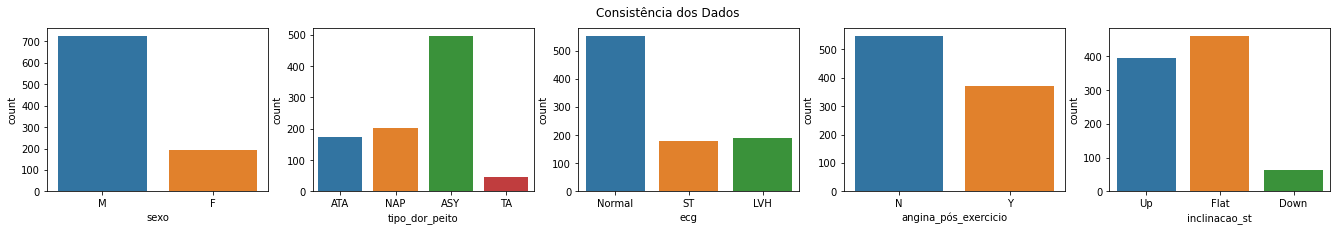

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(23, 3), sharey=False) # subdividindo a área gráfica para os posteriores plots.
fig.suptitle('Consistência dos Dados') # Dando um título para a figura

sns.countplot(ax = axes[0], x = "sexo", data = df_doencas_cardiacas) # plotando um gráfico de barras.
sns.countplot(ax = axes[1], x = "tipo_dor_peito", data = df_doencas_cardiacas) # plotando um gráfico de barras.
sns.countplot(ax = axes[2], x = "ecg", data = df_doencas_cardiacas) # plotando um gráfico de barras.
sns.countplot(ax = axes[3], x = "angina_pós_exercicio", data = df_doencas_cardiacas) # plotando um gráfico de barras.
sns.countplot(ax = axes[4], x = "inclinacao_st", data = df_doencas_cardiacas) # plotando um gráfico de barras.

O resultado da figura acima mostrou que nenhuma variável obteve um valor fora do permitido pelo dicionário de variáveis.

In [13]:
pd.DataFrame(df_doencas_cardiacas.acucar_no_sangue.value_counts())  # contabiliazndo os valores da variável e transformando a saída em um data frame.

,acucar_no_sangue
0,704
1,214


In [14]:
pd.DataFrame(df_doencas_cardiacas['doenca_cardiaca'].value_counts()) # contabiliazndo os valores da variável e transformando a saída em um data frame.

,doenca_cardiaca
1,508
0,410


Tanto o data frame contabilizando a respota para o açucar no sangue, quanto o que informa se o paciente teve doença cardíaca, não apresentaram resultados que não fossem os do dicionário de variáveis.

Como erros de conformidade não foram identificado, logo também não aconteceram erros de integridade. 

In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método .value_counts(...) contabiliza os valores que são apresentados em uma variável do data frame.
# O método pd.DataFrame permite tranformar as variáveis recebidas no argumento em um data frame, essa variável deve estar em um formato de df.
# .subplot(...) faz a divisão da área gráfica que será plotada na figura.
# .countplot(...) plota um gráfico de barras conforme as informações passadas no argumento.

### 6) Erros de Completude

O erro de completude se refere aquele em que as variáveis numéricas contém valores fora do domínio permitido. Através do uso do método **describe(…)**, ou do pelo gráfico boxplot, pode-se verificar as variáveis que contém os valores fora do dominio permitido pelo dicionário de variáveis.



In [15]:
df_doencas_cardiacas.describe()  # obterndo as informações estatísticas gerais das variáveis categóricas.

,idade,pressao,colesterol,acucar_no_sangue,max_freq_cardiaca,depressao_st,doenca_cardiaca
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


O método **describe(...)** permite avaliar os valores máximos e mínimos das variáveis numéricas. Da tabela acima, apenas as variáveis *pressão* e *colesterol* possuem erro de completude, pois elas apresentam o valor mínimo nulo, o qual está fora do intervalo permitido, a figura abaixo também permite avaliar isso. 

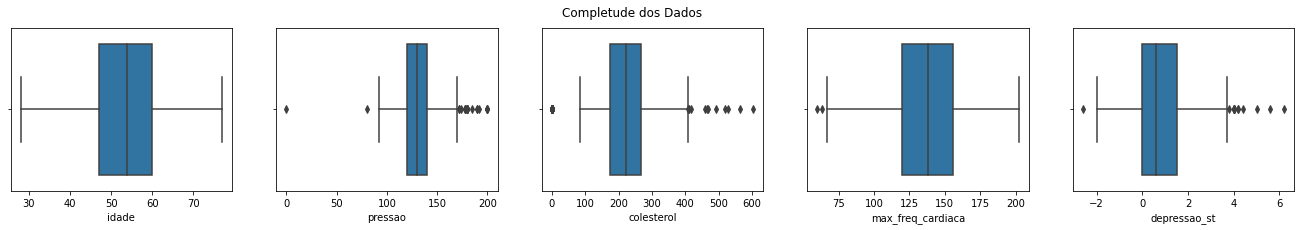

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(23, 3), sharey=False) # subdividindo a área gráfica para os posteriores plots.
fig.suptitle('Completude dos Dados') # Dando um título para a figura

sns.boxplot(ax = axes[0], x=df_doencas_cardiacas["idade"])
sns.boxplot(ax = axes[1], x=df_doencas_cardiacas["pressao"])
sns.boxplot(ax = axes[2], x=df_doencas_cardiacas["colesterol"])
sns.boxplot(ax = axes[3], x=df_doencas_cardiacas.max_freq_cardiaca)
sns.boxplot(ax = axes[4], x=df_doencas_cardiacas.depressao_st)

In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# .subplot(...) faz a divisão da área gráfica que será plotada na figura.
# método .subtitle(...) permite passar o título a figura que contém os gráficos.
# .boxplot(...) plota um gráfico de posição conforme a variável passada no argumento.

### 7) Erros de consistência 

Na etapa em que foi feita a exploração dos erros de conformidade, foi possível avaliar, antecipadamente, os erros de consistência. Observe que como não foram obtidos valores diferentes para um valor que deveria corresponder ao mesmo significado, então não há erro de consistência.  

### 8) Identificando Valores Ausentes

Valores ausentes *NA*, os quais não são preenchidos no *data frame* prejudicam os resultados para a análise ou a produção de modelos de machine learning, assim na exploração, deve-se identificar esses valores.

In [17]:
df_doencas_cardiacas.isnull().sum() # contabilizando as variáveis que contém valores ausentes.

idade                   0
sexo                    0
tipo_dor_peito          0
pressao                 0
colesterol              0
acucar_no_sangue        0
ecg                     0
max_freq_cardiaca       0
angina_pós_exercicio    0
depressao_st            0
inclinacao_st           0
doenca_cardiaca         0
dtype: int64

A tabela acima mostrou que nenhuma das variáveis possue valor nulo.

In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método .isnull(...) avalia se existem nas variáveis valores ausentes.
# método .sum(...) permite somar os elementos passados no argumento em forma de lista.

## Tratando os Dados


### 1) Tratando a Classe das Variáveis

Foi constado que a classe referente a variável *doenca_cardica* e *acucar_no_sangue* encaixasse melhor na classificação de object, assim foi tratado esses valores tornando-os em variáveis categóricas.

In [18]:
df_doencas_cardiacas.acucar_no_sangue = str(df_doencas_cardiacas.acucar_no_sangue) # truncando para a classificação categórica.
df_doencas_cardiacas.doenca_cardiaca = str(df_doencas_cardiacas.doenca_cardiaca)  # truncando para a classificação categórica.
df_doencas_cardiacas.dtypes # verificando a classe das variáveis.

idade                     int64
sexo                     object
tipo_dor_peito           object
pressao                   int64
colesterol                int64
acucar_no_sangue         object
ecg                      object
max_freq_cardiaca         int64
angina_pós_exercicio     object
depressao_st            float64
inclinacao_st            object
doenca_cardiaca          object
dtype: object

In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método .str(...) converte a variável passada no argumento em string, ou seja, tranformando ela em um objeto. 
# obs: tipos objects correspondem as variáveis categórica

### 2) Erros de Completude

Apenas as variáveis *pressão* e *colesterol* possuem erro de completude, foi contabilizado o número de valores nulos que correspondem a essas variáveis, onde *pressão* apresentou um único valor, já *colesterol* apresentou 172. A saída do código abaixo mostra esses resultados.

In [19]:
var = df_doencas_cardiacas.groupby(df_doencas_cardiacas.pressao).size() # contabilizando os possíveis valores do df
print("Numero total de valores nulos para pressao = ", np.array(var)[0]) # exibindo o número contabilizado para o valor nulo
var = df_doencas_cardiacas.groupby(df_doencas_cardiacas.colesterol).size() # contabilizando os possíveis valores do df
print("Numero total de valores nulos para colesterol = ", np.array(var)[0]) # exibindo o número contabilizado para o valor nulo

Numero total de valores nulos para pressao =  1
Numero total de valores nulos para colesterol =  172


A variável *pressão* contém um único valor nulo, por essa razão, a linha que corresponde a esse valor foi removida. 

A variável *colesterol* contém um conjunto de dados muito grande de valores nulos, assim foi atribuído a mediana da variável a esses valores.  

In [20]:
df_remove = df_doencas_cardiacas.loc[(df_doencas_cardiacas['pressao'] == 0)]  # criando um filtro para remover o valor zero
df_doencas_cardiacas = df_doencas_cardiacas.drop(df_remove.index) # associando o filtro ao índice que deve ser removido.
df_doencas_cardiacas.loc[(df_doencas_cardiacas['colesterol'] == 0)] = sts.median(df_doencas_cardiacas.colesterol)  # atribuindo a mediana as variáveis com valor nulo.

A tabela abaixo evidencia que não existem mais linhas contendo o valor nulo para a variável *pressao*. 

In [21]:
df_doencas_cardiacas[df_doencas_cardiacas['pressao']== 0] # exibindo que nenhuma linha nula para variável colesterol foi obtida.

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca


A tabela abaixo evidencia que não existem mais linhas contendo o valor nulo para a variável *colesterol*. 

In [23]:
df_doencas_cardiacas[df_doencas_cardiacas['colesterol']== 0] # exibindo que nenhuma linha nula para variável colesterol foi obtida.

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca


In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O atributo .loc[...] permite acessar as linhas do data frame passando um correspondente filtro, esse mesmo atributo re-
# torna as linhas do data frame selecionadas conforme a condição do filtro dada. 
# O método .drop(...) permite remover as linhas indicadas do data frame.  

## Exportação do projeto

Feita a exploração e o tratamento dos dados podemos exportar o data frame para fazer a análise estatística ou a criação dos modelos de machine learning.


In [24]:
df_doencas_cardiacas.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index = False)

In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO

# A exportação do data frame será direcionada a mesmo diretório em que inserimos anteriormento 
# '/content/drive/MyDrive/trabalho/TD_doença_cardiaca.csv'
# Para salvar o arquivo de dados utilizamos a função .to_csv(...). 
# Essa operação é importante pra manter a integridade dos dados explorados e tratados,
# a fim de não fazermos modificações indesejáveis na análise.

## Conclusão

Este projeto teve como objetivo fazer a exploração e o tratamento do *data set* que informa os fatores clínicos e laboratoriais para prever doenças cardíacas nos pacientes, os repectivos trabalhos foram compridos:


* modificação do nome das variáveis, visando a melhor interpretação sobre o significado das colunas do data set. A variável *Age* foi alterada para *idade*, *Sex* para *sexo*, *ChestPainType* para *tipo_dor_peito*, *RestingBP* para *pressao*, *Cholesterol* para *colesterol*, *FastingBP* *acucar_no_sangue*, *RestingECG* para *ecg*, *MaxHR* para *max_freq_cardiaca*, *ExerciseAngina* para *angina_pós_exercicio*, *Oldpeak* para *depressao_st*, *ST_Slope* para *inclinacao_st* e *HeartDiseas* para *doenca_cardiaca*.

* levantamento das variáveis que são categóricas e numéricas. Foi identificado na exploração que apenas as variáveis *idade*, *pressao*, *colesterol*, *max_freq_cardiaca*, *depressao_st*, *acucar_no_sangue* e *doenca_cardiaca* são numéricas o restante são categóricas. No entanto, no tratamento dos dados foi alterado as variáveis *acucar_no_sangue* e *doenca_cardiaca* para o tipo categórica, já que a informação que elas levantam no seu valor se encaixam melhor na classificação categórica.

* exploração do erro de duplicidade, nenhuma linha contém informações duplicadas.

* exploração do erro de conformidade onde nenhum erro foi identificado, logo também não houve erro de integridade.

* exploração do problema de completude e tratamento desse erro para as variáveis *colesterol* e *pressao*, para a primeira variável foram contabilizados 172 valores nulos, já para segunda apenas um. Foi substituído os valores nulos da variável *colesterol* pela moda, já a linha que continha o valor nulo para variável *pressao* foi removida.

* exploração do erro de consistência, não foi identificado qualquer problema para as variáveis.

* identificação de valores ausentes na exploração dos dados, onde nenhuma variável apresentou esse valor.



## Referências

* A elaboração desse projeto tem como inspiração a seção 4 do curso: [Machine Learning com Python](https://www.udemy.com/course/machine-learning-com-python/).